In [4]:
%matplotlib inline

from __future__ import print_function
import matplotlib.pyplot as plt
import pyart
import numpy as np
from scipy import ndimage, signal
import time
from matplotlib.ticker import Formatter
import scipy.ndimage as spyi


In [5]:
root_path = '/media/meso/DATA/phd/obs/radar/CP2/mdv/s_band/volumes/20141127/'
lat_lines = np.arange(-28,-26,.1)
lon_lines = np.arange(152,154,.1)
plt_max_lat = -27.4
plt_min_lat = -27.7
plt_max_lon = 153.2
plt_min_lon = 152.9
plt_rmin    = 10
plt_rmax    = 70
plt_vmin    = -25
plt_vmax    = 25
plt_r_cmap  = pyart.graph.cm.NWSRef
plt_v_cmap  = pyart.graph.cm.BuDRd18
bris_lat    = -27.466
bris_lon    = 153.033
fig_sz      = [8,8]

In [11]:
def plot_ppi_multi(fn,subpl,tilt,cbar_flag):
    #load radar data and create display object
    radar   = pyart.io.read_mdv(fn)
    display = pyart.graph.RadarMapDisplay(radar)
    #create axis
    ax = fig.add_subplot(subpl)
    #create velocity ppi
    display.plot_ppi_map('velocity', tilt, vmin=plt_vmin, vmax=plt_vmax,
                            lat_lines = lat_lines, lon_lines = lon_lines,
                            max_lat = plt_max_lat, min_lat = plt_min_lat, max_lon = plt_max_lon, min_lon = plt_min_lon,
                            cmap = plt_v_cmap,colorbar_label='',title='',colorbar_flag=cbar_flag)
    #add Brisbane label
    display.plot_point( bris_lon, bris_lat, label_text = '', label_offset=[.005,.005], symbol = 'wo')

    #find raw ppi data start/stop index
    start = radar.get_start(tilt)
    end   = radar.get_end(tilt) + 1
    #load ppi data
    data  = radar.fields['reflectivity']['data'][start:end]
    #apply guassian smoothing
    data  = spyi.gaussian_filter(data, sigma=1.2)

    #load gat lat/lon grids
    lon = radar.gate_longitude['data'][start:end]
    lat = radar.gate_latitude['data'][start:end]

    #convert lat,lon to basemap coords
    x,y = display.basemap(lon,lat)
    
    #plot contours
    contours = ax.contour(x, y, data, [35], linewidths=2, colors='k',
                          linestyles='-', antialiased=True)
    contours = ax.contour(x, y, data, [45,55], linewidths=1, colors='k',
                          linestyles='-', antialiased=True)
    contours = ax.contour(x, y, data, [65], linewidths=2, colors='k',
                          linestyles='--', antialiased=True)
    
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(20)

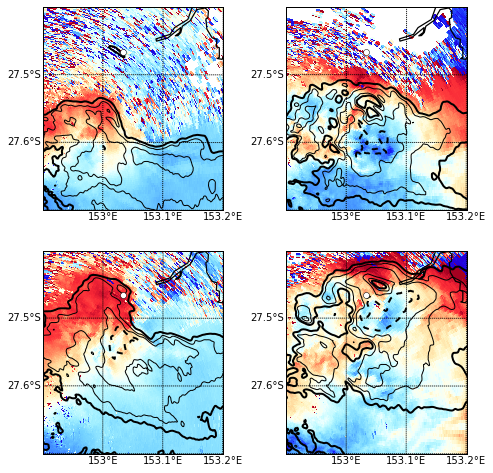

In [12]:
fig = plt.figure(figsize=fig_sz)

ffn = root_path + '062902.mdv'
plot_ppi_multi(ffn,221,1,0)
plot_ppi_multi(ffn,222,7,0)

ffn = root_path + '064104.mdv'
plot_ppi_multi(ffn,223,1,0)
plot_ppi_multi(ffn,224,7,0)

plt.savefig('tmp/CP2_20141127.png', dpi=200)


In [3]:
fig = plt.figure(figsize=fig_sz)
fn = root_path + '062902.mdv'
plot_ppi_multi(fn,111,0,1)
plt.savefig('tmp/CP2_20141127_cb.png', dpi=200)


NameError: name 'plt' is not defined